###**DESCRIPCIÓN DEL PROBLEMA:**

Predicción del nivel de estadío de cáncer de pulmón, dado por las siguientes etiquetas: bajo, medio y alto. Dichas etiquetas se encuentran determinadas por una serie de datos que comprenden factores de riesgos, habitos de vida y diversas sintomatologías asociadas al cáncer.

El dataset implementado en este proyecto fue extraído de:

https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link

#Estructura Del Dataset:
El dataset se encuentra conformado por 23 caracteristicas de tipo categórica ordinal (excepto la variable edad que es de tipo numérica) y 1000 instancias (pacientes diagnosticados con cáncer de pulmón), organizadas de la siguiente manera:

*   Age: Edad

*   Gender = Sexo. [Hombre = 1, Mujer = 2]
*   Air Pollution: Nivel de contaminación del aire. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

*   Alcohol use: Nivel de consumo de alcohol. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.
*  Dust Allergy: Nivel de alergia al polvo. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

*   OccuPational Hazards: Nivel de riesgos laborales. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

*   Genetic Risk: Nivel de riesgos genéticos. Los valores se escalan del 1 al 7, donde 1 representa el menor nivel y 7 el máximo nivel.

* Chronic Lung Disease: Grado de enfermedad Crónica pulmonar. Los valores se escalan del 1 al 7, donde 1 representa el menor nivel y 7 el máximo nivel.

* Balance diet: Nivel de dieta equilibrada. Los valores se escalan del 1 al 7, donde 1 representa el menor nivel y 7 el máximo nivel.

* Obesity: Grado de obesidad. Los valores se escalan del 1 al 7, donde 1 representa el menor nivel y 7 el máximo nivel.

* Smoking: Nivel de fumador. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

* Passive smoker: Nivel de fumador pasivo. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

* Chest pain: Nivel de dolor en el pecho. Los valores se escalan del 1 al 9, donde 1 representa el menor nivel y 9 el máximo nivel.

* Coughing of blood: Nivel con tos con sangre. Los valores se escalan del 1 al 9, donde 1 representa el menor nivel y 9 el máximo nivel.

* Fatigue: Nivel de fatiga. Los valores se escalan del 1 al 9, donde 1 representa el menor nivel y 9 el máximo nivel.

* Weight Loss: Nivel de perdida de peso. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

* Shortness of Breath: Grado de dificultad respiratoria. Los valores se escalan del 1 al 9, donde 1 representa el menor nivel y 9 el máximo nivel.

* Wheezin: Nivel silibancia. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

* Swallowing Difficulty. Nivel de dificultad para deglutar. Los valores se escalan del 1 al 8, donde 1 representa el menor nivel y 8 el máximo nivel.

* Clubbing of Finger Nails: Nivel de acropaquia en las uñas de los dedos. Los valores se escalan del 1 al 9, donde 1 representa el menor nivel y 9 el máximo nivel.

* Frequent Cold: Frecuencia de resfriados. Los valores se escalan del 1 al 7, donde 1 representa el menor nivel y 7 el máximo nivel.

* Dry Cough: Nivel de tos seca. Los valores se escalan del 1 al 7, donde 1 representa el menor nivel y 7 el máximo nivel.

* Snoring: Nivel de ronquidos. Los valores se escalan del 1 al 7, donde 1 representa el menor nivel y 7 el máximo nivel.

* Level: Variable objetiva. Nivel de estadió del cáncer de pulmón. Las etiquetas se clasifican en Low, Medium, High.

# PIPELINE LUNG CANCER PREDICTION

# 1.RECOLECCIÓN DE DATOS
1.1 Importar y Leer el DataSet

In [ ]:
# Importar librerías
import pandas as pd # Libreria para dataframes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split # Libreria para la división de los datos de entrenamiento y validación
from sklearn.naive_bayes import GaussianNB # Libreria para clasificador Naive Bayes
from sklearn.metrics import  confusion_matrix, accuracy_score,precision_score, recall_score, f1_score, classification_report # Libreria para métricas
from sklearn.decomposition import PCA # Libreria para trabajar análisis de Componentes
from sklearn.preprocessing import StandardScaler

#Funciones

In [ ]:
def matrizConfusion():
  sns.heatmap(confusion_matrix(Y_test,Y_Predict), annot=True, cmap='Greens', linewidth=.9)
  plt.title('Matriz De Confusión')
  plt.xlabel('Y Predicted')
  plt.ylabel('Y True')
  return

def metricas(titulo):
  accuracy = accuracy_score(Y_test, Y_Predict)*100
  precision = precision_score(Y_test, Y_Predict, average='weighted')*100
  recall = recall_score(Y_test, Y_Predict, average='weighted')*100
  f1 = f1_score(Y_test, Y_Predict, average='weighted')*100
  print(titulo)
  print(f"🔹 Accuracy: {accuracy:.2f}%")
  print(f"🔹 Precision (PPV): {precision:.2f}%")
  print(f"🔹 Recall (Sensibilidad, TPR): {recall:.2f}%")
  print(f"🔹 F1-Score: {f1:.2f}%")
  return

In [ ]:
# Cargar el dataset
dataCancer = pd.read_csv('/content/Data/cancer patient data sets.csv');
dataCancer

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# 2.ANÁLISIS EXPLORATORIO DE DATOS (EDA)

# Comprendiendo los Datos

In [ ]:
#Verificación de la información que contiene el dataset, valores nulos y/o repetidos.
dataCancer.info()
print('\nTotal de valores nulos: \n' + str(dataCancer.isnull().sum()))
print('\nTotal de valores duplicados: ' + str(dataCancer.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

#Observaciones:

*   La variable Objetiva [Level] es de tipo object. Por lo tanto debe codificarse.
Las columnas [index, Patient Id]  se eliminan por no ser de interes para la predicción.
*   No se registran valores nulos
*   Nos se registran valores duplicados

In [ ]:
#Eliminación de las columnas index y    Patient Id.
dataCancer = dataCancer.drop(columns = ['index', 'Patient Id']);
dataCancer

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


# Codificación de la variable objetiva

Etiquetas codificadas:

Low : 0, Medium : 1, High : 2

In [ ]:
# Se codifican con el método .map()
dataCancerCopy = dataCancer.copy()
mapeoClases = {'Low':0, 'Medium':1, 'High':2}
dataCancerCopy['Codificación'] = dataCancerCopy['Level'].map(mapeoClases)
print(dataCancerCopy.loc[:,['Level','Codificación']].head(20))
dataCancerCopy = dataCancerCopy.drop(columns=['Level']).rename(columns={'Codificación':'Level'});

     Level  Codificación
0      Low             0
1   Medium             1
2     High             2
3     High             2
4     High             2
5     High             2
6      Low             0
7      Low             0
8   Medium             1
9   Medium             1
10    High             2
11    High             2
12  Medium             1
13    High             2
14     Low             0
15  Medium             1
16  Medium             1
17    High             2
18    High             2
19  Medium             1


In [ ]:
dataCancerCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

# Observaciones:
Ahora la variable objetiva (Level) que antes era tipo object ahora es tipo int

 # Análisis de valores atípicos y/o sesgos

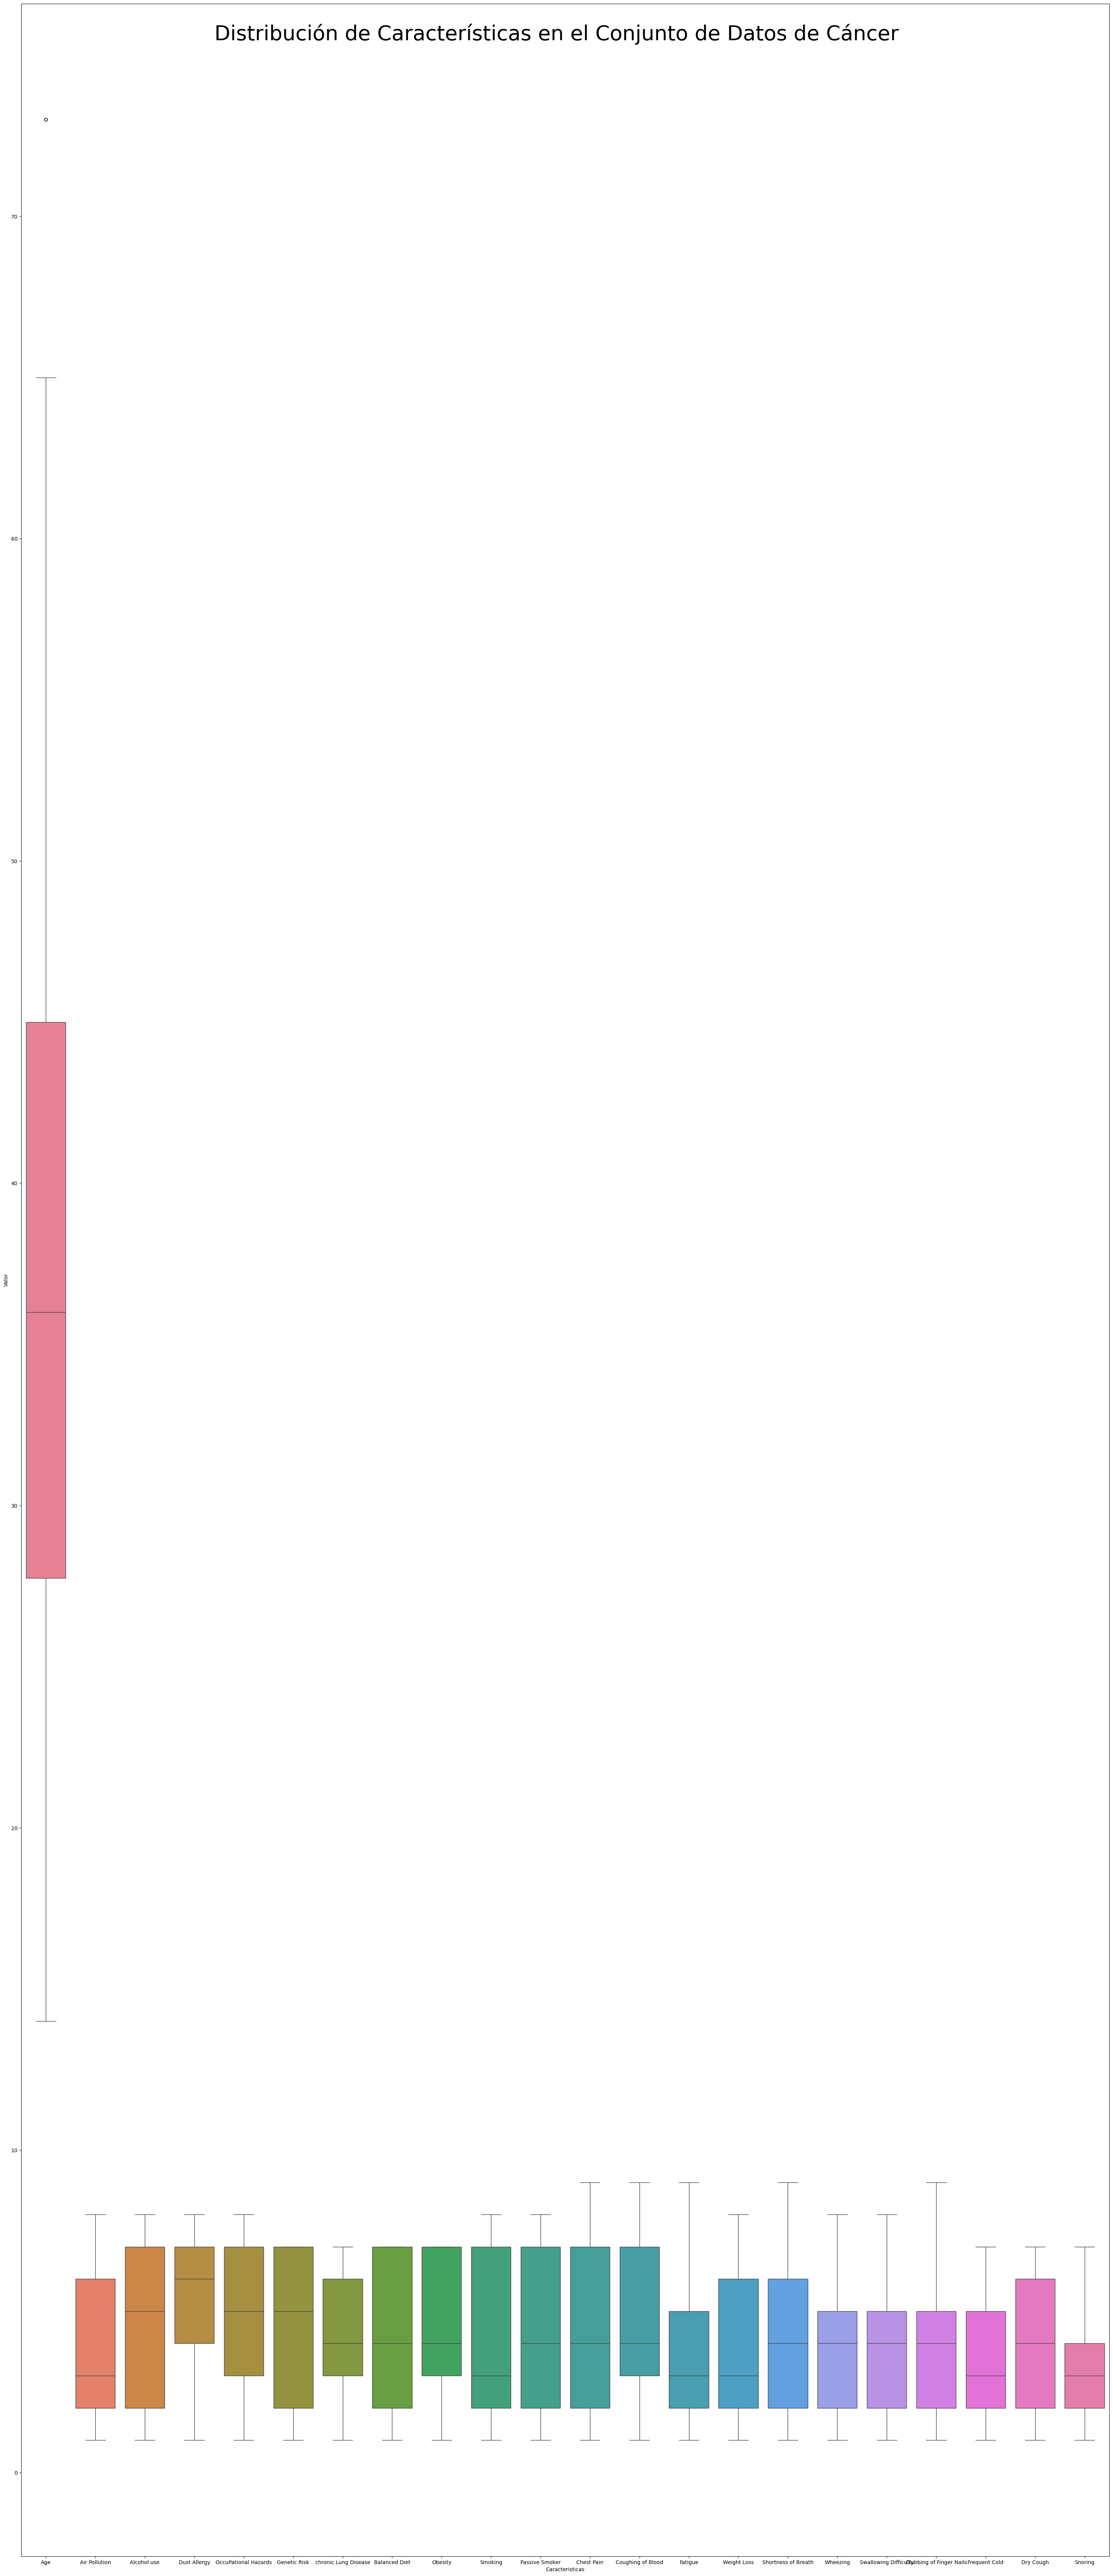

In [ ]:
#Gráfica de bigotes para buscar valores atipicos y/o sesgos
plt.figure(figsize=(30,70))
sns.boxplot(data = dataCancerCopy.drop(columns = ['Gender','Level']))
plt.suptitle("Distribución de Características en el Conjunto de Datos de Cáncer", fontsize=40)
plt.xlabel('Caracteristicas')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

#Observaciones:


*   Se registra un valor atípico en la característica [Age]

*   Las características [Dust allergy, OccuPational Hazards, Genetic risk, Balance diet, Obesity] La mediana se inclina hacia la parte superior de la caja, y el bigote inferior se extiende más que el superior. Esto se debe a que la mayoría de los datos se concentran en la parte de arriba de la distribución, mientras que una cola larga se extiende hacia la parte baja, lo que indica una asimetría negativa.

* Las características [Air pollution, Chest pain, Fatigue, Weight Loss, Shortness of Breath, Wheezing, Swallowing Difficulty, Clubbing of Finger Nails, Frequent Cold, Snoring] La mediana se inclina hacia la parte inferior de la caja, y el bigote superior se extiende más que el inferior. Esto se debe a que la mayoría de los datos se concentran en la parte baja de la distribución, mientras que una cola larga se extiende hacia la parte alta, lo que indica una asimetría positiva.

#Análisis de Correlación

<Axes: title={'center': 'Matriz de Correlación'}>

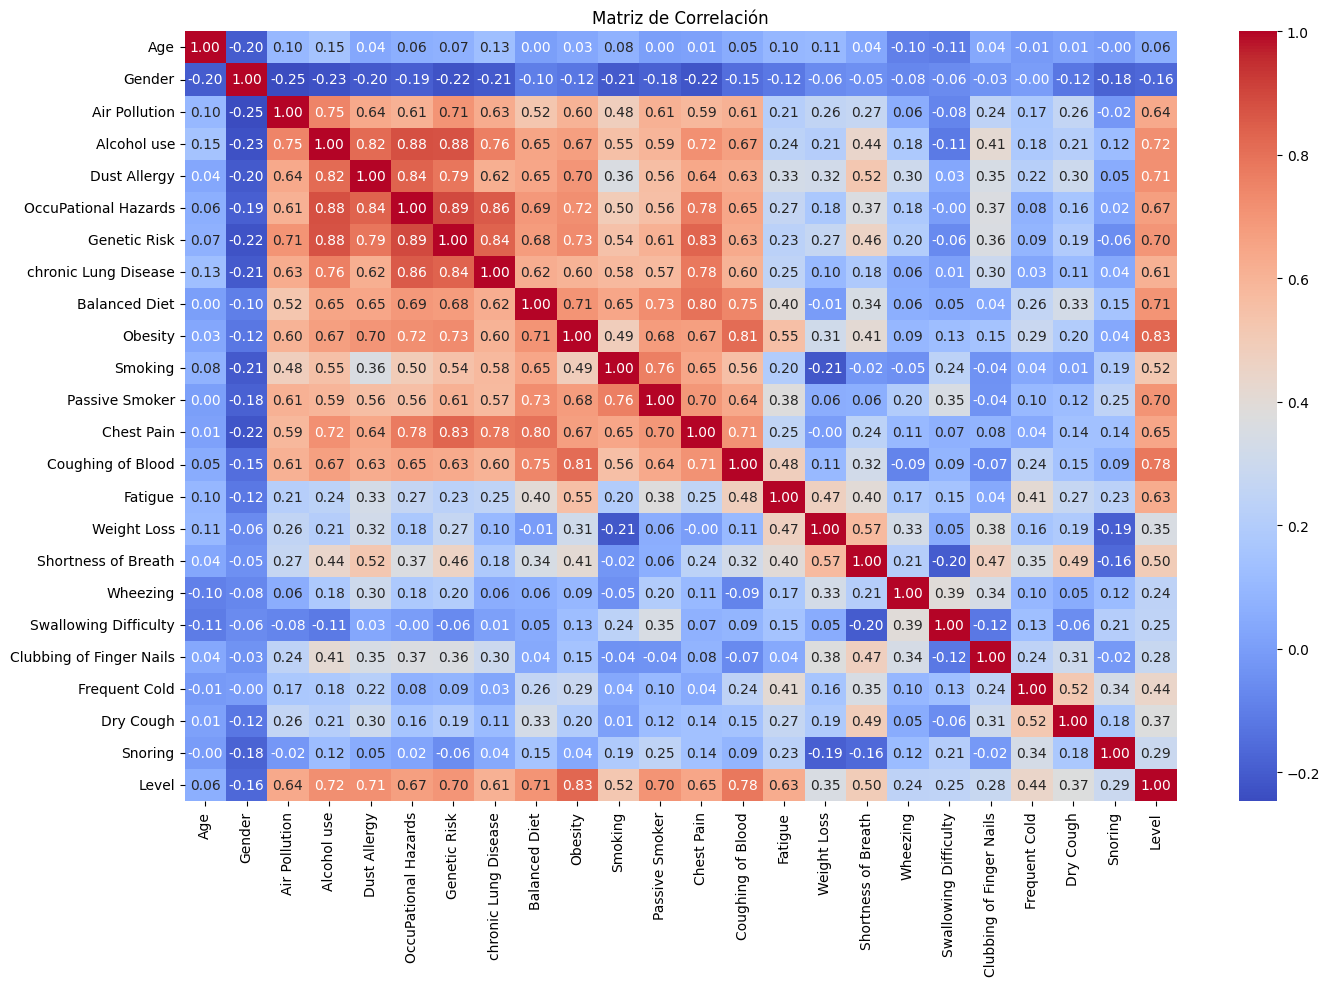

In [ ]:
# Analisis de correlación y mapa de calor
matriz_corr_dataCancerCopy = dataCancerCopy.corr()
# se genera un mapa calor para una mejor visualización de los datos
plt.figure(figsize=(16,10))
plt.title("Matriz de Correlación")
sns.heatmap(matriz_corr_dataCancerCopy, annot=True, cmap="coolwarm", fmt=".2f")

#Observaciones:
* Baja correlación de las variables predictoras [age, Gender] tanto con la variable objetiva como con las demás variables predictoras.

*   Alta correlación de las caracteristicas (colinealidad)[Air pollution, Alcohol use, Dust allergy, OccuPational Hazards, Genetic risk, Chronic lung disease, Balance diet, Obesity, Smoking, Passive smoking, Chest pain, Coughing of Blood] entre ellas y con la variable objetiva.

#Conclusiones:
La colinealidad puede causar problemas
de sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y no se generaliza bien a los datos nuevos. De igual manera, dificulta la determinación del efecto individual de cada variable predictora en la variable objetivo.

Por lo tanto, se debe aplicar un reducción de las dimensiones de las caracteristicas para mitigar la colinealidad.

#Análisis de Balanceo de la variable objetiva

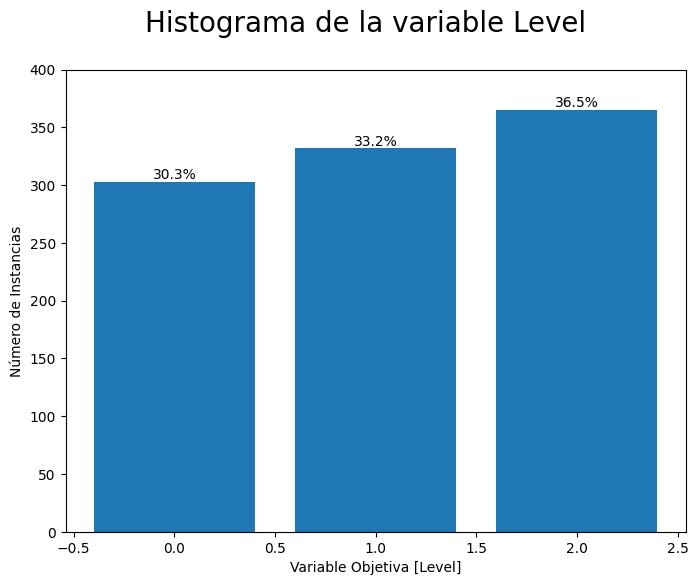

Porcentaje[%] de las etiquetas:
 Level
2    36.5
1    33.2
0    30.3
Name: proportion, dtype: float64


In [ ]:
# verificamos si hay desbanlaceo entre las etiquetas
porcentajeEtiquetas = dataCancerCopy['Level'].value_counts(normalize = True)*100
frecuencias = dataCancerCopy['Level'].value_counts()
porcentajes = (frecuencias / len(dataCancerCopy)) * 100
plt.figure(figsize=(8,6))
barras = plt.bar(frecuencias.index, frecuencias.values)

plt.suptitle("Histograma de la variable Level", fontsize=20)
plt.xlabel('Variable Objetiva [Level]')
plt.ylabel('Número de Instancias')
plt.ylim(None, 400)

for barra, porcentaje in zip(barras, porcentajes):
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, f'{porcentaje:.1f}%', ha='center', va='bottom')

plt.show()
print(f'Porcentaje[%] de las etiquetas:\n {porcentajeEtiquetas}')

#Observaciones:
La distribución de las etiquetas dentro la variable objetiva indican una diferencia del alrededor del 3% entre las etiquetas y una diferencia del 6 % entre la menor etiqueta [1] y la mayor etiqueta [3].

#Conclusiones:
El dataSet no requiere balanceo.

# Aplicacion de PCA

In [ ]:
dataCancerCopy2 = dataCancerCopy.copy()
# Aplicar PCA  para reducir dimensionalidad a 8 componentes.
pca = PCA(n_components=8)
scaler = StandardScaler()
data_Cancer_scaled = scaler.fit_transform(dataCancerCopy2.drop(columns=['Level']))
principal_components = pca.fit_transform(data_Cancer_scaled)

# Explicación de varianza
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("\nVarianza total:", pca.explained_variance_ratio_.sum())

Varianza explicada por cada componente: [0.39580565 0.11740061 0.08769539 0.06596929 0.05649457 0.05286558
 0.0343725  0.03003148]

Varianza total: 0.840635059395342


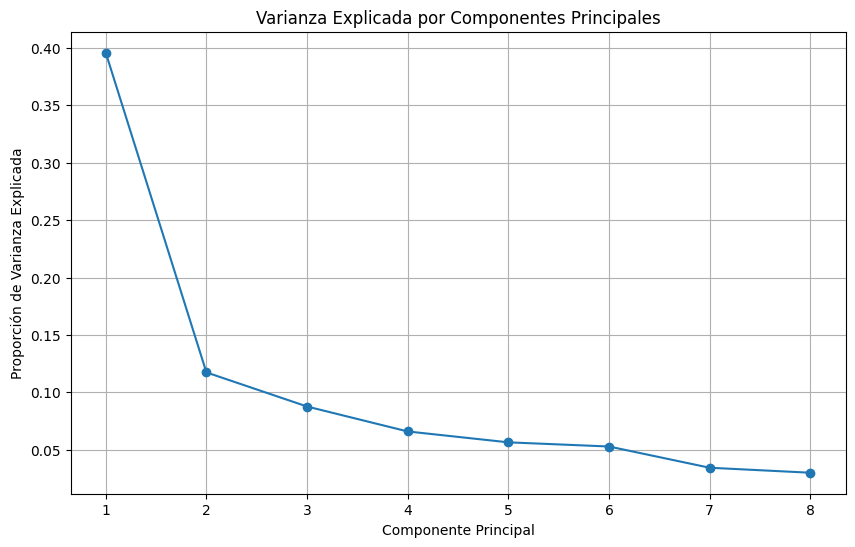

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

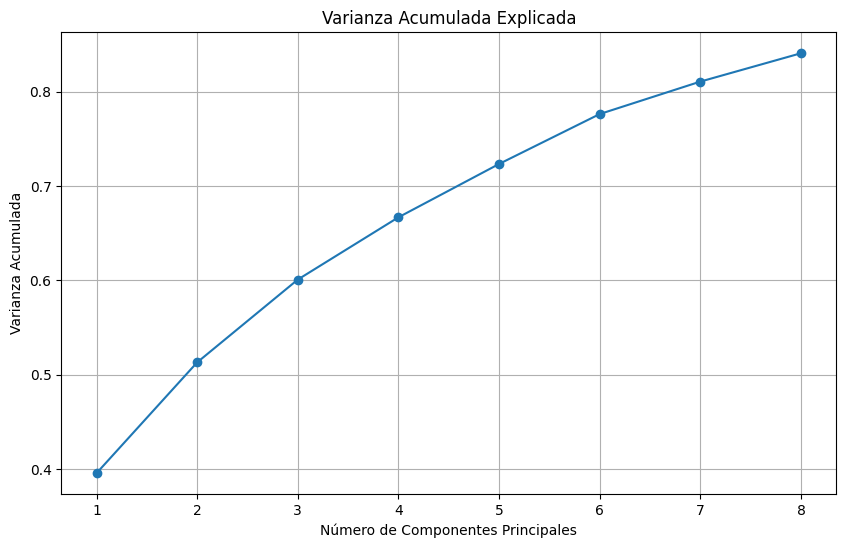

In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza Acumulada Explicada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

In [ ]:
#Convertimos los PCAs en un dataframe
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pc_df['Level'] = dataCancerCopy2['Level'].values  # Agregar la columna 'Level' para colorear los puntos
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Level
0,-2.532266,-0.685608,0.056141,-0.308613,-0.220362,0.737880,-0.945278,1.119602,0
1,-2.499235,1.046104,0.491503,1.867268,-0.048592,-0.965318,-2.804152,-1.099380,1
2,1.710896,2.877557,0.429408,-2.537105,1.172248,0.785246,-1.236978,0.491346,2
3,3.931440,-1.240071,0.945878,-1.762590,-1.569948,-0.688485,-0.140739,-0.490043,2
4,3.599374,-2.584447,-0.532676,-0.990434,-0.034350,0.647045,0.026444,-0.223923,2
...,...,...,...,...,...,...,...,...,...
995,3.713500,-1.619119,1.489598,1.439824,-0.233086,0.563613,-0.171922,-1.071613,2
996,4.032301,-0.276396,0.348624,1.001960,1.508345,0.324732,1.386575,1.651605,2
997,1.512550,2.928770,0.433276,-2.529480,2.331948,-0.658148,-0.320206,0.507402,2
998,3.355887,-2.564568,-0.370874,-0.768547,1.527850,-1.766072,0.140665,0.131219,2


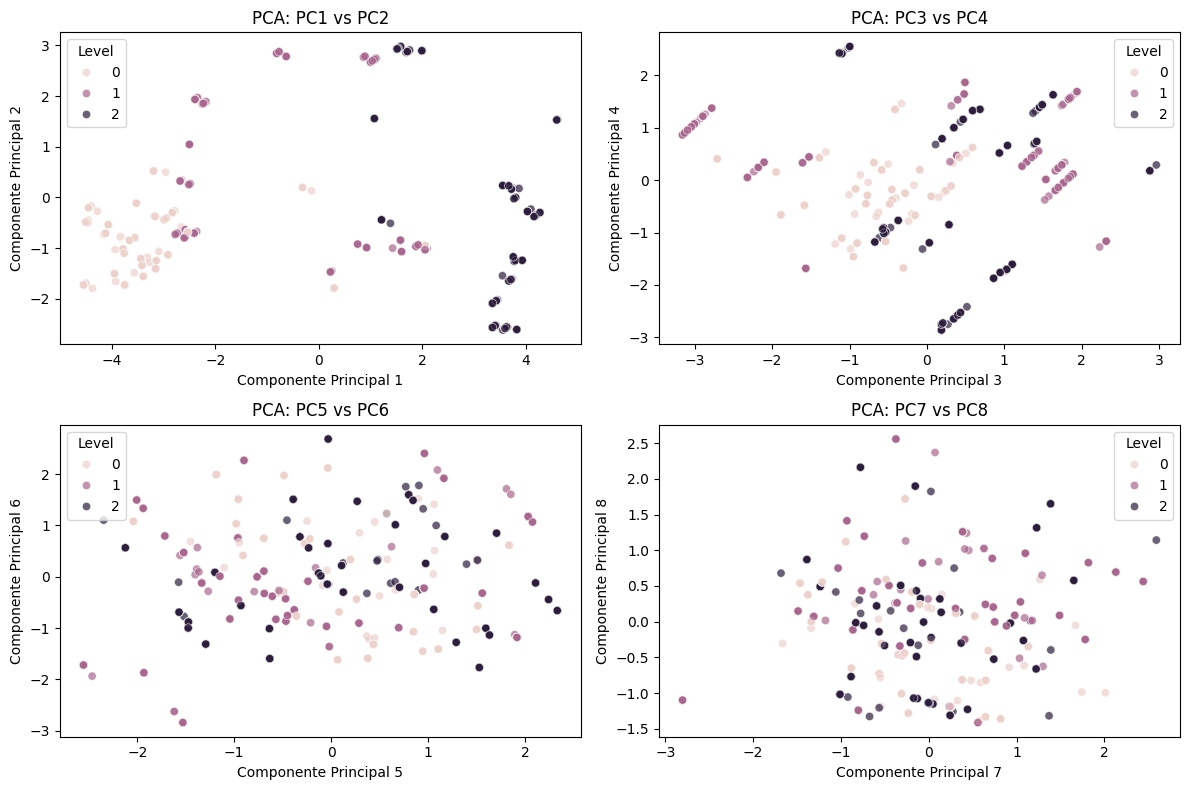

In [ ]:
# Gráfica de los componentes de PCA
plt.figure(figsize=(12, 8))

# Primer gráfico: PC1 vs PC2
plt.subplot(2, 2, 1)
sns.scatterplot(x="PC1", y="PC2", hue='Level', data=pc_df, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA: PC1 vs PC2")

# Segundo gráfico: PC3 vs PC4
plt.subplot(2, 2, 2)
sns.scatterplot(x="PC3", y="PC4", hue='Level', data=pc_df, alpha=0.7)
plt.xlabel("Componente Principal 3")
plt.ylabel("Componente Principal 4")
plt.title("PCA: PC3 vs PC4")

plt.subplot(2, 2, 3)
sns.scatterplot(x="PC5", y="PC6", hue='Level', data=pc_df, alpha=0.7)
plt.xlabel("Componente Principal 5")
plt.ylabel("Componente Principal 6")
plt.title("PCA: PC5 vs PC6")

plt.subplot(2, 2, 4)
sns.scatterplot(x="PC7", y="PC8", hue='Level', data=pc_df, alpha=0.7)
plt.xlabel("Componente Principal 7")
plt.ylabel("Componente Principal 8")
plt.title("PCA: PC7 vs PC8")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'PCA: PC2 vs PC4')

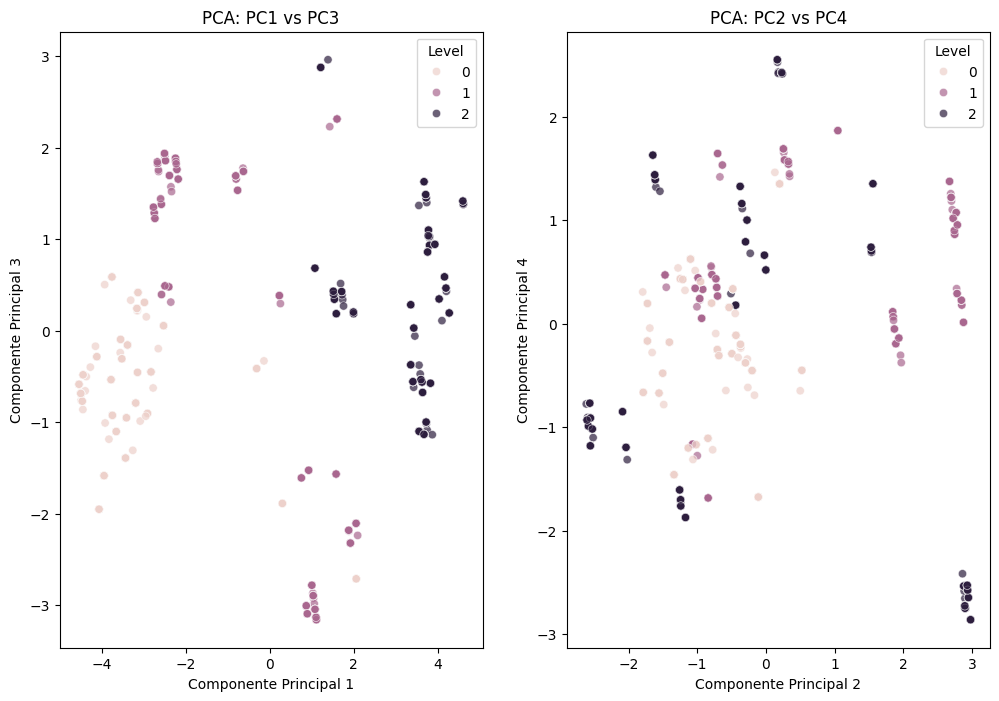

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)

sns.scatterplot(x="PC1", y="PC3", hue='Level', data=pc_df, alpha=0.7)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 3")
plt.title("PCA: PC1 vs PC3")

plt.subplot(1,2,2)
sns.scatterplot(x="PC2", y="PC4", hue='Level', data=pc_df, alpha=0.7)
plt.xlabel("Componente Principal 2")
plt.ylabel("Componente Principal 4")
plt.title("PCA: PC2 vs PC4")

#Observaciones:
*Se conserva el 84% de la información original con un PCA de 8 componentes.

* PC1 vs PC2: Existe una clara separación entre los tres niveles ("Level"). Los puntos de cada nivel tienden a agruparse en regiones distintas del gráfico, lo que indica una mayor cantidad de varianza entre los datos y por ende una mayor efectividad de los componentes 1 y 2 para identificar las etiquetas de Level

* PC3 vs PC4: La separación entre los niveles es menos sin embargo, se pueden observar algunos patrones de distinción.

* PC5 vs PC6: Los puntos se superponen más, lo que sugiere una menor capacidad para distinguir entre las categorías.

* PC7 vs PC8: Capacidad muy baja para distinguir las etiquetas.


# Conslusiones
 Los primeros componentes PC1 y PC2 son los más informativos y efectivos para distinguir entre las categorías de "Level".

# 3.DIVISÓN DE DATOS

In [ ]:
# Dividimos las caracteristicas (X) de las etiquetas (Y)
#X = dataCancerCopy.drop(columns = ['Level'])
X = principal_components
Y = dataCancerCopy.loc[:,'Level']
print(f'Caracteristicas (X):')
X

Caracteristicas (X):


array([[-2.5322661 , -0.68560809,  0.05614072, ...,  0.73787953,
        -0.94527751,  1.11960239],
       [-2.49923463,  1.04610398,  0.49150291, ..., -0.96531754,
        -2.80415166, -1.09938009],
       [ 1.71089577,  2.8775569 ,  0.42940837, ...,  0.78524589,
        -1.23697796,  0.49134605],
       ...,
       [ 1.51254993,  2.92877021,  0.43327574, ..., -0.6581479 ,
        -0.32020636,  0.50740216],
       [ 3.35588653, -2.56456813, -0.37087357, ..., -1.76607224,
         0.14066464,  0.13121855],
       [ 1.99065749,  2.89378614,  0.20558197, ...,  1.49031518,
        -0.83131068, -0.0150421 ]])

In [ ]:
print(f'\nEtiquetas (Y):\n {Y}')


Etiquetas (Y):
 0      0
1      1
2      2
3      2
4      2
      ..
995    2
996    2
997    2
998    2
999    2
Name: Level, Length: 1000, dtype: int64


In [ ]:
# Realizamos la división de X_train, Y_train, X_test, Y_test en una proporción (80-20)% con un random_state = 100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=100 )
print(f'Tamaño de X_train: {X_train.shape}')
print(f'Tamaño de Y_train: {Y_train.shape}')
print(f'Tamaño de X_test: {X_test.shape}')
print(f'Tamaño de Y_test: {Y_test.shape}')

Tamaño de X_train: (800, 8)
Tamaño de Y_train: (800,)
Tamaño de X_test: (200, 8)
Tamaño de Y_test: (200,)


# 4. SELECCIÓN Y CONSTRUCCIÓN DEL MÓDELO

#Clasificador Naive Bayes

In [ ]:
# Algoritmo Naive Bayes Gaussiano.
Modelo = GaussianNB()

# 5. ENTRENAR EL MÓDELO

In [ ]:
Modelo.fit(X_train,Y_train)

GaussianNB()

# 6.EVALUACIÓN DEL MÓDELO

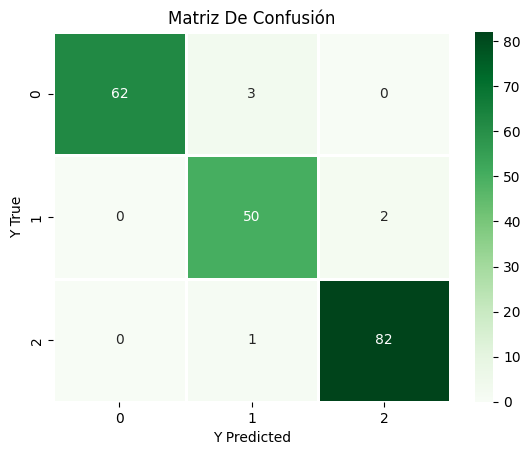

In [ ]:
Y_Predict = Modelo.predict(X_test)
# Matriz de confusión
matrizConfusion()

# Métricas de evaluación

In [ ]:
# Calcular métricas derivadas
# Imprimir resultados
metricas('Resultados Naive Bayes:')

Resultados Naive Bayes:
🔹 Accuracy: 97.00%
🔹 Precision (PPV): 97.09%
🔹 Recall (Sensibilidad, TPR): 97.00%
🔹 F1-Score: 97.02%


#Conclusiones:


*   Accuracy: El modelo predijo correctamente el 97.00% de las instancias en el conjunto de prueba.

*   Precisión: Todas las instancias que el modelo clasificó como pertenecientes a una clase específica, el 97.09% realmente pertenecían a esa clase. Esto indica que el modelo tiene una baja tasa de falsos positivos.

* Recall: El modelo identificó correctamente el 97.00% de todas las instancias que realmente pertenecían a cada clase. Esto indica que el modelo tiene una baja tasa de falsos negativos.

* F1-Score: Indica un buen equilibrio entre la precisión y el recall. Esto significa que el modelo es tanto preciso como sensible.



# 7. GENERAR ARCHIVO PICKLE

In [ ]:
# save like h5, pkl, lib file
import pickle
pickle.dump(scaler,open("scaler.pkl","wb")) #Generar .pickle del scaler
pickle.dump(pca,open("pca.pkl","wb")) #Generar .pickle del scaler
pickle.dump(Modelo,open('model_bayes.pkl','wb')) # generar el archivo.pickle

# 8.EXPERIMENTOS

#Experimento #1
 * Naive Bayes
 * Division 70-30
 * random_state=42

Naive Bayes:
🔹 Accuracy: 89.33%
🔹 Precision (PPV): 89.86%
🔹 Recall (Sensibilidad, TPR): 89.33%
🔹 F1-Score: 89.37%


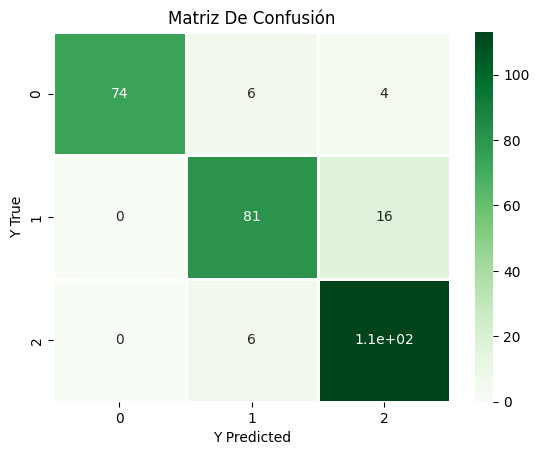

In [ ]:
# Realizamos la división de X_train, Y_train, X_test, Y_test en una proporción (70-30)%
dataCancerCopy3 = dataCancerCopy.copy()
X1 = dataCancerCopy3.drop(columns=['Level'])
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, test_size= 0.3, random_state=42 )
# Algoritmo Naive Bayes Gaussiano.
gnb = GaussianNB()
# Entrenamiento
gnb.fit(X_train, Y_train)
# Predicción
Y_Predict = gnb.predict(X_test)
# Evaluamos el rendimiento
matrizConfusion()
metricas('Naive Bayes:')

#Experimento#2
* Naive Bayes.
* Se elimina la característica [OccuPational Hazards] debido a colinealidad
* Division 80-20
* random_state=100

Naives Bayes:
🔹 Accuracy: 94.50%
🔹 Precision (PPV): 94.69%
🔹 Recall (Sensibilidad, TPR): 94.50%
🔹 F1-Score: 94.47%


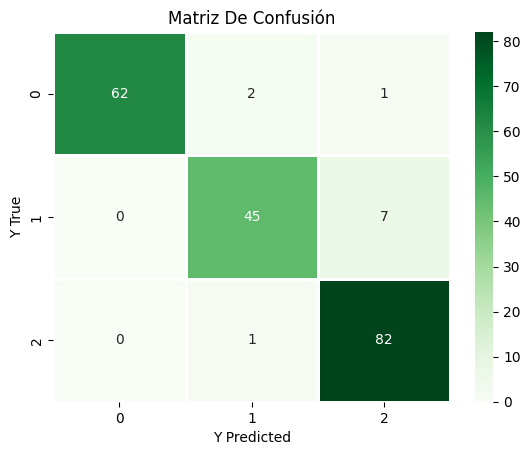

In [ ]:
X2 = dataCancerCopy3.drop(columns = ['OccuPational Hazards', 'Level'])
# Realizamos la división de X_train, Y_train, X_test, Y_test en una proporción (80-20)%
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y, test_size= 0.2, random_state=100 )
# Algoritmo Naive Bayes Gaussiano.
gnb = GaussianNB()
# Entrenamiento
gnb.fit(X_train, Y_train)
# Predicción
Y_Predict = gnb.predict(X_test)
# Evaluamos el rendimiento
matrizConfusion()
metricas('Naives Bayes:')

#Observaciones:
Al eliminar una caracteristica con colinealidad el desempeño del Naive Bayes mejora. Ya que son varias las características que poseen dicha colinealidad se opta realizar PCA para reducir la dimensionalidad y mitigar la alta correlación de las variables entre ellas.

# Experimento #3
Naive Bayes con PCA con 8 componentes y  valor de random_state = 42

Resultados Naive Bayes:
🔹 Accuracy: 93.00%
🔹 Precision (PPV): 93.62%
🔹 Recall (Sensibilidad, TPR): 93.00%
🔹 F1-Score: 93.05%


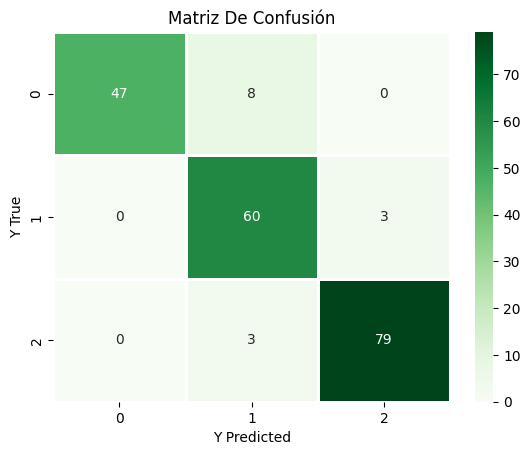

In [ ]:
X3 = principal_components
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y, test_size= 0.2, random_state=42 )
Modelo1 = GaussianNB()
Modelo1.fit(X_train,Y_train)
Y_Predict = Modelo1.predict(X_test)

# sns.heatmap(confusion_matrix(Y_test,Y_Predict), annot=True, cmap='Greens', linewidth=.9)
# plt.title('Matriz De Confusión')
# plt.xlabel('Y Predicted')
# plt.ylabel('Y True');
matrizConfusion()
# Imprimir resultados
metricas('Resultados Naive Bayes:')

#Experimento #4
* Naive Bayes Categorico
* División 80-20
* random_state = 42
* Sin PCA

Naive Bayes Categorico:
🔹 Accuracy: 100.00%
🔹 Precision (PPV): 100.00%
🔹 Recall (Sensibilidad, TPR): 100.00%
🔹 F1-Score: 100.00%


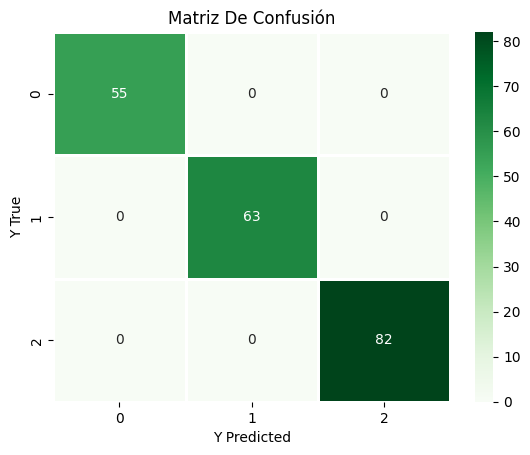

In [ ]:
from sklearn.naive_bayes import CategoricalNB
dataCancerCopy4 = dataCancerCopy2.copy()
X4 = dataCancerCopy4.drop(columns=['Level'])
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size= 0.2, random_state=42)
clf = CategoricalNB()
clf.fit(X_train, Y_train)
Y_Predict = clf.predict(X_test)
# Evaluamos el rendimiento
matrizConfusion()
metricas('Naive Bayes Categorico:')

#Experimento #5
* Clasificador XGBoost
* División 80-20
*random_state = 42
* Sin PCA

In [ ]:
import xgboost as xgb
X5 = X4
X_train, X_test, Y_train, Y_test = train_test_split(X4, Y, test_size= 0.2, random_state=42)
#Modelo xgb.boost
clasificador = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
#entrenamiento
clasificador.fit(X_train, Y_train)
#Predicción
Y_Predict = clasificador.predict(X_test)
#Evaluamos
accuracy = accuracy_score(Y_test, Y_Predict)
print(f"Precisión: {accuracy:.4f}")
print(classification_report(Y_test, Y_Predict))

Precisión: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



#Experimento #6
* Random Forest
* Sin PCA


In [ ]:
from sklearn.ensemble import RandomForestClassifier
X6 = X5
X_train, X_test, Y_train, Y_test = train_test_split(X6, Y, test_size=0.2, random_state=42)
randomForest = RandomForestClassifier(n_estimators=100, random_state=42)
randomForest.fit(X_train, Y_train)
Y_Predict = randomForest.predict(X_test)
accuracy = accuracy_score(Y_test, Y_Predict)
print(f"Precisión: {accuracy:.4f}")
print(classification_report(Y_test, Y_Predict))

Precisión: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

